In [1]:
# Import libraries 
import pandas as pd 
import numpy as np 
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# Download the vader lexicon 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Aaditya
[nltk_data]     Narayan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Loading the dataset 
data=pd.read_csv("C:/Users/Aaditya Narayan/Desktop/Folder1/Datasets_Machinelearning/zomato_reviews.csv",encoding='utf-8')
data.head()

,Unnamed: 0,rating,review
0,0,5,nice
1,1,5,"best biryani , so supportive staff of outlet ,..."
2,2,4,delivery boy was very decent and supportive.👌👍
3,3,1,"worst biryani i have tasted in my life, half o..."
4,4,5,all food is good and tasty . will order again ...


In [4]:
# checking for null values 
data.isnull().sum()

Unnamed: 0    0
rating        0
review        1
dtype: int64

In [5]:
# Since their is only one null value,so dropping the null row 
data.dropna(subset=['review'],inplace=True)

In [6]:
# Create and instance of the SentimentIntensityAnalyzer class 
analyzer=SentimentIntensityAnalyzer()

In [7]:
# Analyze the sentiment of each review and add a column for the sentiment scores 
scores=data['review'].apply(lambda x: analyzer.polarity_scores(x))
scores.head()

0    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
1    {'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'comp...
2    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3    {'neg': 0.24, 'neu': 0.76, 'pos': 0.0, 'compou...
4    {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...
Name: review, dtype: object

In [8]:
# Concatenate the data and the polarity scores 
data=pd.concat([data,scores.apply(pd.Series)],axis=1)

In [9]:
data

,Unnamed: 0,rating,review,neg,neu,pos,compound
0,0,5,nice,0.000,0.000,1.000,0.4215
1,1,5,"best biryani , so supportive staff of outlet ,...",0.000,0.691,0.309,0.7713
2,2,4,delivery boy was very decent and supportive.👌👍,0.000,1.000,0.000,0.0000
3,3,1,"worst biryani i have tasted in my life, half o...",0.240,0.760,0.000,-0.6249
4,4,5,all food is good and tasty . will order again ...,0.000,0.847,0.153,0.4404
...,...,...,...,...,...,...,...
5474,5474,5,complain,1.000,0.000,0.000,-0.3612
5475,5475,5,it took 1 hour to assign valvet and thn prepar...,0.141,0.753,0.106,-0.3343
5476,5476,5,"took for an hour to prepare 3 khawsa, which in...",0.000,0.913,0.087,0.2263
5477,5477,1,"very very late, littrally did time pass and it...",0.000,1.000,0.000,0.0000


In [10]:
# Renaming the compound score and Unnamed:0 as the overall sentiment score and Customer_Id
data.rename(columns={'compound':'Overall_Sent_Score','Unnamed: 0':'Customer_Id'},inplace=True) 
data

,Customer_Id,rating,review,neg,neu,pos,Overall_Sent_Score
0,0,5,nice,0.000,0.000,1.000,0.4215
1,1,5,"best biryani , so supportive staff of outlet ,...",0.000,0.691,0.309,0.7713
2,2,4,delivery boy was very decent and supportive.👌👍,0.000,1.000,0.000,0.0000
3,3,1,"worst biryani i have tasted in my life, half o...",0.240,0.760,0.000,-0.6249
4,4,5,all food is good and tasty . will order again ...,0.000,0.847,0.153,0.4404
...,...,...,...,...,...,...,...
5474,5474,5,complain,1.000,0.000,0.000,-0.3612
5475,5475,5,it took 1 hour to assign valvet and thn prepar...,0.141,0.753,0.106,-0.3343
5476,5476,5,"took for an hour to prepare 3 khawsa, which in...",0.000,0.913,0.087,0.2263
5477,5477,1,"very very late, littrally did time pass and it...",0.000,1.000,0.000,0.0000


In [11]:
# Sentiment Classifier 
data['Sentiment_Type']=data['Overall_Sent_Score'].apply(lambda c:'Positive' if c>=0 else 'Negative')
data1=data.loc[:,['review','Overall_Sent_Score',"Sentiment_Type"]]
data1.head()

,review,Overall_Sent_Score,Sentiment_Type
0,nice,0.4215,Positive
1,"best biryani , so supportive staff of outlet ,...",0.7713,Positive
2,delivery boy was very decent and supportive.👌👍,0.0000,Positive
3,"worst biryani i have tasted in my life, half o...",-0.6249,Negative
4,all food is good and tasty . will order again ...,0.4404,Positive


In [12]:
# Overall performance of VADER 
import pandas as pd 
pd.crosstab(data['rating'],data['Sentiment_Type'])

Sentiment_Type,Negative,Positive
rating,,
1,561,1330
2,107,261
3,141,333
4,124,333
5,644,1644


In [13]:
# Finding count and distribution 
print(data['Sentiment_Type'].value_counts())


Sentiment_Type
Positive    3901
Negative    1577
Name: count, dtype: int64


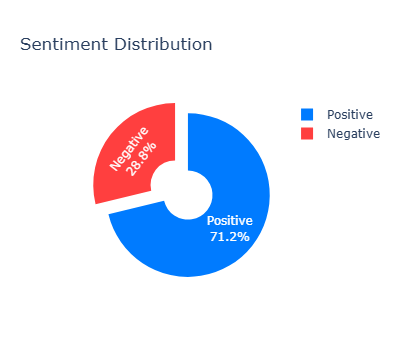

In [21]:
import plotly.express as px

sentiment_counts = data['Sentiment_Type'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

colors = {
    'Positive': '#007BFF',   
    'Negative': '#FF3F3F',   
}

fig = px.pie(

     sentiment_counts,
    names='Sentiment',
    values='Count',
    title="Sentiment Distribution",
    hole=0.3,
    color='Sentiment',
    color_discrete_map=colors
  
)




fig.update_traces(pull=[0.1, 0.1, 0.1], textinfo='percent+label')

fig.show()


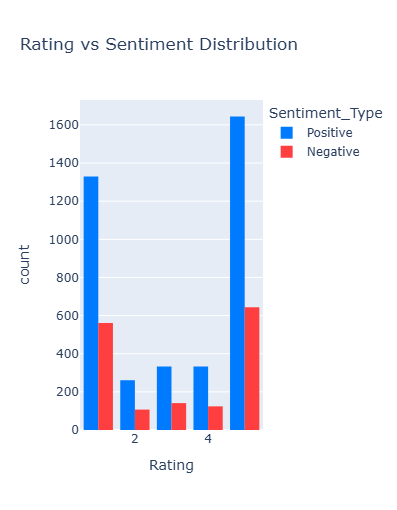

In [22]:
# Rating vs Sentiment plot 

fig = px.histogram(
    data,
    x="rating",
    color="Sentiment_Type",
    barmode="group",
    title=" Rating vs Sentiment Distribution",
    labels={"rating": "Rating", "Predicted_Sentiment": "Sentiment"},
    color_discrete_map=colors
    
)
fig.update_layout(
    width=700, height=500)
    


fig.show()


In [16]:
# Count of positive and negative reviews
positive_count = data[data['Sentiment_Type'] == 'Positive'].shape[0]
negative_count = data[data['Sentiment_Type'] == 'Negative'].shape[0]


In [17]:
# Overall Satisfaction trend
if positive_count > negative_count:
    print("Overall Trend: Customers are mostly satisfied ")
elif negative_count > positive_count:
    print("Overall Trend: Customers are mostly dissatisfied ")
else:
    print("Overall Trend: Customers are neutral ")


print(f"Positive reviews: {positive_count}")
print(f"Negative reviews: {negative_count}")

Overall Trend: Customers are mostly satisfied 
Positive reviews: 3901
Negative reviews: 1577
